In [1]:
import pandas as pd
import numpy as np
import talib
import pyrenko
import datetime as dt
from logging import Logger
from catalyst import run_algorithm
from catalyst.api import symbol, order_target_percent, get_datetime, record, get_open_orders, order_target_percent
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%load_ext catalyst

In [3]:
NAMESPACE = 'RenkoBB'
log = Logger(NAMESPACE)

In [4]:
def initialize(context):
    context.i = 0
    context.asset = symbol('btc_usdt')
    context.tf = '1H'
    context.atr_time = 51
    context.bb = 6
    context.model = pyrenko.renko()

In [71]:
def handle_data(context, data):
    
    current_time = get_datetime().time()
    if current_time.hour == 0 and current_time.minute == 0:
        print('Current date is ' + str(get_datetime().date()))
        
    context.i+=1
    if context.i < context.atr_time:
        return
    
    
#     if len(context.model.get_renko_prices()) == 0:
    if len(get_open_orders(context.asset)) == 0:
        print(context.i)
        
        bb_data = data.history(context.asset,
                                  'close',
                                  bar_count=context.bb,
                                  frequency=context.tf)

        hlc_data = data.history(context.asset,
                                   fields=['high', 'low', 'close'],
                                   bar_count=context.atr_time,
                                   frequency=context.tf)

        upperband, middleband, lowerband = talib.BBANDS(bb_data, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
        upperband, middleband, lowerband = upperband[-1], middleband[-1], lowerband[-1]
        bb_range = upperband - lowerband

    #     optimal_brick = context.model.set_brick_size(HLC_history=hlc_data)
        price = data.current(context.asset,'price')

        record(price=price,
               cash=context.portfolio.cash,
               upperband=upperband,
               middleband=middleband,
               lowerband=lowerband)
        
        
        
        
        last_price = data.history(context.asset,
                                'price',
                                bar_count = context.atr_time - 1, 
                                frequency = context.tf
                                )

        context.model = pyrenko.renko()
        optimal_brick = context.model.set_brick_size(HLC_history=hlc_data)
        context.model.build_history(prices = last_price)
        context.model.plot_renko()
        
        if bb_range > 500:
            print('Optimal brick is ', optimal_brick)
            prev = context.model.get_renko_prices()
            prev_dir = context.model.get_renko_directions()
            last_dir = prev_dir[-4:-1]
            print('Prices',prev)
            print('Directions', prev_dir)
            
            if last_dir == '-1, 1, 1':
                order_target_percent(context.asset, 1)
                print('Postition opened at', last_price)
                print(get_open_orders(context.asset))
        else:
            print('BB not triggered')

            
    else:
        pass

In [72]:
def analyze(context, perf):
    print('Total return: ' + str(perf.algorithm_period_return[-1]))
    print('Sortino coef: ' + str(perf.sortino[-1]))
    print('Max drawdown: ' + str(np.min(perf.max_drawdown)))
    print('Alpha: ' + str(perf.alpha[-1]))
    print('Beta: ' + str(perf.beta[-1]))
    
    
    matplotlib.rc('figure', figsize=(25, 10))

    exchange = list(context.exchanges.values())[0]
    quote_currency = exchange.quote_currency.upper()
    
    ax1 = plt.subplot(211)
    perf.loc[:, ['price', 'upperband', 'middleband', 'lowerband']].plot(
        ax=ax1,
        label='Price')

    ax1.set_ylabel('{asset}\n({quote})'.format(
        asset=context.asset.symbol,
        quote=quote_currency
    ))
    start, end = ax1.get_ylim()
    ax1.yaxis.set_ticks(np.arange(start, end, (end - start) / 5))

[2019-10-03 07:35:49.490935] INFO: run_algo: Catalyst version 0.5.21
[2019-10-03 07:35:49.492260] WARNING: run_algo: Catalyst is currently in ALPHA. It is going through rapid development and it is subject to errors. Please use carefully. We encourage you to report any issue on GitHub: https://github.com/enigmampc/catalyst/issues
[2019-10-03 07:35:52.496538] INFO: run_algo: running algo in backtest mode
[2019-10-03 07:35:52.504438] INFO: exchange_algorithm: initialized trading algorithm in backtest mode


Current date is 2018-01-01
51
BB not triggered
52
BB not triggered
53
BB not triggered
54
BB not triggered
55
BB not triggered
56
BB not triggered
57
BB not triggered
58
BB not triggered
59
BB not triggered
60
BB not triggered
61
BB not triggered
62
BB not triggered
63
BB not triggered
64
BB not triggered
65
BB not triggered
66
BB not triggered
67
BB not triggered
68
BB not triggered
69
BB not triggered
70
BB not triggered
71
BB not triggered
72
BB not triggered
73
BB not triggered
74
BB not triggered
75
BB not triggered
76
BB not triggered
77
BB not triggered
78
BB not triggered
79
BB not triggered
80
BB not triggered
81
BB not triggered
82
BB not triggered
83
BB not triggered
84
BB not triggered
85
BB not triggered
86
BB not triggered
87
BB not triggered
88
BB not triggered
89
BB not triggered
90
BB not triggered
91
BB not triggered
92
BB not triggered
93
BB not triggered
94
BB not triggered
95
BB not triggered
96
BB not triggered
97
BB not triggered
98
BB not triggered
99
BB not tri

BB not triggered
450
BB not triggered
451
BB not triggered
452
BB not triggered
453
BB not triggered
454
BB not triggered
455
BB not triggered
456
BB not triggered
457
BB not triggered
458
BB not triggered
459
BB not triggered
460
BB not triggered
461
BB not triggered
462
BB not triggered
463
BB not triggered
464
BB not triggered
465
BB not triggered
466
BB not triggered
467
BB not triggered
468
BB not triggered
469
BB not triggered
470
BB not triggered
471
BB not triggered
472
BB not triggered
473
BB not triggered
474
BB not triggered
475
BB not triggered
476
BB not triggered
477
BB not triggered
478
BB not triggered
479
BB not triggered
480
BB not triggered
481
BB not triggered
482
BB not triggered
483
BB not triggered
484
BB not triggered
485
BB not triggered
486
BB not triggered
487
BB not triggered
488
BB not triggered
489
BB not triggered
490
BB not triggered
491
BB not triggered
492
BB not triggered
493
BB not triggered
494
BB not triggered
495
BB not triggered
496
BB not trigge

BB not triggered
845
BB not triggered
846
BB not triggered
847
BB not triggered
848
BB not triggered
849
BB not triggered
850
BB not triggered
851
BB not triggered
852
BB not triggered
853
BB not triggered
854
BB not triggered
855
BB not triggered
856
BB not triggered
857
BB not triggered
858
BB not triggered
859
BB not triggered
860
BB not triggered
861
BB not triggered
862
BB not triggered
863
BB not triggered
864
BB not triggered
865
BB not triggered
866
BB not triggered
867
BB not triggered
868
BB not triggered
869
BB not triggered
870
BB not triggered
871
BB not triggered
872
BB not triggered
873
BB not triggered
874
BB not triggered
875
BB not triggered
876
BB not triggered
877
BB not triggered
878
BB not triggered
879
BB not triggered
880
BB not triggered
881
BB not triggered
882
BB not triggered
883
BB not triggered
884
BB not triggered
885
BB not triggered
886
BB not triggered
887
BB not triggered
888
BB not triggered
889
BB not triggered
890
BB not triggered
891
BB not trigge

BB not triggered
1237
BB not triggered
1238
BB not triggered
1239
BB not triggered
1240
BB not triggered
1241
BB not triggered
1242
BB not triggered
1243
BB not triggered
1244
BB not triggered
1245
BB not triggered
1246
BB not triggered
1247
BB not triggered
1248
BB not triggered
1249
BB not triggered
1250
BB not triggered
1251
BB not triggered
1252
BB not triggered
1253
BB not triggered
1254
BB not triggered
1255
BB not triggered
1256
BB not triggered
1257
BB not triggered
1258
BB not triggered
1259
BB not triggered
1260
BB not triggered
1261
BB not triggered
1262
BB not triggered
1263
BB not triggered
1264
BB not triggered
1265
BB not triggered
1266
BB not triggered
1267
BB not triggered
1268
BB not triggered
1269
BB not triggered
1270
BB not triggered
1271
BB not triggered
1272
BB not triggered
1273
BB not triggered
1274
BB not triggered
1275
BB not triggered
1276
BB not triggered
1277
BB not triggered
1278
BB not triggered
1279
BB not triggered
1280
BB not triggered
1281
BB not tri

BB not triggered
1620
BB not triggered
1621
BB not triggered
1622
BB not triggered
1623
BB not triggered
1624
BB not triggered
1625
BB not triggered
1626
BB not triggered
1627
BB not triggered
1628
BB not triggered
1629
BB not triggered
1630
BB not triggered
1631
BB not triggered
1632
BB not triggered
1633
BB not triggered
1634
BB not triggered
1635
BB not triggered
1636
BB not triggered
1637
BB not triggered
1638
BB not triggered
1639
BB not triggered
1640
BB not triggered
1641
BB not triggered
1642
BB not triggered
1643
BB not triggered
1644
BB not triggered
1645
BB not triggered
1646
BB not triggered
1647
BB not triggered
1648
BB not triggered
1649
BB not triggered
1650
BB not triggered
1651
BB not triggered
1652
BB not triggered
1653
BB not triggered
1654
BB not triggered
1655
BB not triggered
1656
BB not triggered
1657
BB not triggered
1658
BB not triggered
1659
BB not triggered
1660
BB not triggered
1661
BB not triggered
1662
BB not triggered
1663
BB not triggered
1664
BB not tri

BB not triggered
2001
BB not triggered
2002
BB not triggered
2003
BB not triggered
2004
BB not triggered
2005
BB not triggered
2006
BB not triggered
2007
BB not triggered
2008
BB not triggered
2009
BB not triggered
2010
BB not triggered
2011
BB not triggered
2012
BB not triggered
2013
BB not triggered
2014
BB not triggered
2015
BB not triggered
2016
BB not triggered
2017
BB not triggered
2018
BB not triggered
2019
BB not triggered
2020
BB not triggered
2021
BB not triggered
2022
BB not triggered
2023
BB not triggered
2024
BB not triggered
2025
BB not triggered
2026
BB not triggered
2027
BB not triggered
2028
BB not triggered
2029
BB not triggered
2030
BB not triggered
2031
BB not triggered
2032
BB not triggered
2033
BB not triggered
2034
BB not triggered
2035
BB not triggered
2036
BB not triggered
2037
BB not triggered
2038
BB not triggered
2039
BB not triggered
2040
BB not triggered
2041
BB not triggered
2042
BB not triggered
2043
BB not triggered
2044
BB not triggered
2045
BB not tri

2378
BB not triggered
2379
BB not triggered
2380
BB not triggered
2381
BB not triggered
2382
BB not triggered
2383
BB not triggered
2384
BB not triggered
2385
BB not triggered
2386
BB not triggered
2387
BB not triggered
2388
BB not triggered
2389
BB not triggered
2390
BB not triggered
2391
BB not triggered
2392
BB not triggered
2393
BB not triggered
2394
BB not triggered
2395
BB not triggered
2396
BB not triggered
2397
BB not triggered
2398
BB not triggered
2399
BB not triggered
2400
BB not triggered
2401
BB not triggered
2402
BB not triggered
2403
BB not triggered
2404
BB not triggered
2405
BB not triggered
2406
BB not triggered
2407
BB not triggered
2408
BB not triggered
2409
BB not triggered
2410
BB not triggered
2411
BB not triggered
2412
BB not triggered
2413
BB not triggered
2414
BB not triggered
2415
BB not triggered
2416
BB not triggered
2417
BB not triggered
2418
BB not triggered
2419
BB not triggered
2420
BB not triggered
2421
BB not triggered
2422
BB not triggered
2423
BB no

2757
BB not triggered
2758
BB not triggered
2759
BB not triggered
2760
BB not triggered
2761
BB not triggered
2762
BB not triggered
2763
BB not triggered
2764
BB not triggered
2765
BB not triggered
2766
BB not triggered
2767
BB not triggered
2768
BB not triggered
2769
BB not triggered
2770
BB not triggered
2771
BB not triggered
2772
BB not triggered
2773
BB not triggered
2774
BB not triggered
2775
BB not triggered
2776
BB not triggered
2777
BB not triggered
2778
BB not triggered
2779
BB not triggered
2780
BB not triggered
2781
BB not triggered
2782
BB not triggered
2783
BB not triggered
2784
BB not triggered
2785
BB not triggered
2786
BB not triggered
2787
BB not triggered
2788
BB not triggered
2789
BB not triggered
2790
BB not triggered
2791
BB not triggered
2792
BB not triggered
2793
BB not triggered
2794
BB not triggered
2795
BB not triggered
2796
BB not triggered
2797
BB not triggered
2798
BB not triggered
2799
BB not triggered
2800
BB not triggered
2801
BB not triggered
2802
BB no

BB not triggered
3134
BB not triggered
3135
BB not triggered
3136
BB not triggered
3137
BB not triggered
3138
BB not triggered
3139
BB not triggered
3140
BB not triggered
3141
BB not triggered
3142
BB not triggered
3143
BB not triggered
3144
BB not triggered
3145
BB not triggered
3146
BB not triggered
3147
BB not triggered
3148
BB not triggered
3149
BB not triggered
3150
BB not triggered
3151
BB not triggered
3152
BB not triggered
3153
BB not triggered
3154
BB not triggered
3155
BB not triggered
3156
BB not triggered
3157
BB not triggered
3158
BB not triggered
3159
BB not triggered
3160
BB not triggered
3161
BB not triggered
3162
BB not triggered
3163
BB not triggered
3164
BB not triggered
3165
BB not triggered
3166
BB not triggered
3167
BB not triggered
3168
BB not triggered
3169
BB not triggered
3170
BB not triggered
3171
BB not triggered
3172
BB not triggered
3173
BB not triggered
3174
BB not triggered
3175
BB not triggered
3176
BB not triggered
3177
BB not triggered
3178
BB not tri

BB not triggered
3511
BB not triggered
3512
BB not triggered
3513
BB not triggered
3514
BB not triggered
3515
BB not triggered
3516
BB not triggered
3517
BB not triggered
3518
BB not triggered
3519
BB not triggered
3520
BB not triggered
3521
BB not triggered
3522
BB not triggered
3523
BB not triggered
3524
BB not triggered
3525
BB not triggered
3526
BB not triggered
3527
BB not triggered
3528
BB not triggered
3529
BB not triggered
3530
BB not triggered
3531
BB not triggered
3532
BB not triggered
3533
BB not triggered
3534
BB not triggered
3535
BB not triggered
3536
BB not triggered
3537
BB not triggered
3538
BB not triggered
3539
BB not triggered
3540
BB not triggered
3541
BB not triggered
3542
BB not triggered
3543
BB not triggered
3544
BB not triggered
3545
BB not triggered
3546
BB not triggered
3547
BB not triggered
3548
BB not triggered
3549
BB not triggered
3550
BB not triggered
3551
BB not triggered
3552
BB not triggered
3553
BB not triggered
3554
BB not triggered
3555
BB not tri

BB not triggered
3890
BB not triggered
3891
BB not triggered
3892
BB not triggered
3893
BB not triggered
3894
BB not triggered
3895
BB not triggered
3896
BB not triggered
3897
BB not triggered
3898
BB not triggered
3899
BB not triggered
3900
BB not triggered
3901
BB not triggered
3902
BB not triggered
3903
BB not triggered
3904
BB not triggered
3905
BB not triggered
3906
BB not triggered
3907
BB not triggered
3908
BB not triggered
3909
BB not triggered
3910
BB not triggered
3911
BB not triggered
3912
BB not triggered
3913
BB not triggered
3914
BB not triggered
3915
BB not triggered
3916
BB not triggered
3917
BB not triggered
3918
BB not triggered
3919
BB not triggered
3920
BB not triggered
3921
BB not triggered
3922
BB not triggered
3923
BB not triggered
3924
BB not triggered
3925
BB not triggered
3926
BB not triggered
3927
BB not triggered
3928
BB not triggered
3929
BB not triggered
3930
BB not triggered
3931
BB not triggered
3932
BB not triggered
3933
BB not triggered
3934
BB not tri

BB not triggered
4269
BB not triggered
4270
BB not triggered
4271
BB not triggered
4272
BB not triggered
4273
BB not triggered
4274
BB not triggered
4275
BB not triggered
4276
BB not triggered
4277
BB not triggered
4278
BB not triggered
4279
BB not triggered
4280
BB not triggered
4281
BB not triggered
4282
BB not triggered
4283
BB not triggered
4284
BB not triggered
4285
BB not triggered
4286
BB not triggered
4287
BB not triggered
4288
BB not triggered
4289
BB not triggered
4290
BB not triggered
4291
BB not triggered
4292
BB not triggered
4293
BB not triggered
4294
BB not triggered
4295
BB not triggered
4296
BB not triggered
4297
BB not triggered
4298
BB not triggered
4299
BB not triggered
4300
BB not triggered
4301
BB not triggered
4302
BB not triggered
4303
BB not triggered
4304
BB not triggered
4305
BB not triggered
4306
BB not triggered
4307
BB not triggered
4308
BB not triggered
4309
BB not triggered
4310
BB not triggered
4311
BB not triggered
4312
BB not triggered
4313
BB not tri

[2019-10-03 07:37:01.697613] INFO: Performance: Simulated 3 trading days out of 3.
[2019-10-03 07:37:01.698034] INFO: Performance: first open: 2018-01-01 00:00:00+00:00
[2019-10-03 07:37:01.698468] INFO: Performance: last close: 2018-01-03 23:59:00+00:00


4314
BB not triggered
4315
BB not triggered
4316
BB not triggered
4317
BB not triggered
4318
BB not triggered
4319
BB not triggered
4320
BB not triggered
Total return: 0.0
Sortino coef: None
Max drawdown: 0.0
Alpha: 0.0
Beta: 0.0


,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_base,capital_used,cash,ending_cash,...,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return,upperband
period_close,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:01:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,10000,0.0,NaN,10000.0,...,0,0,None,10000,0.0,0.0,0,[],NaN,NaN
2018-01-01 00:02:00+00:00,0.0,0.0,0.0,0.001000,0.011225,0.0,10000,0.0,NaN,10000.0,...,0,0,None,10000,0.0,0.0,1,[],0.001,NaN
2018-01-01 00:03:00+00:00,0.0,0.0,0.0,0.002001,0.022461,0.0,10000,0.0,NaN,10000.0,...,0,0,None,10000,0.0,0.0,1,[],0.001,NaN
2018-01-01 00:04:00+00:00,0.0,0.0,0.0,0.003003,0.033709,0.0,10000,0.0,NaN,10000.0,...,0,0,None,10000,0.0,0.0,1,[],0.001,NaN
2018-01-01 00:05:00+00:00,0.0,0.0,0.0,0.004006,0.044967,0.0,10000,0.0,NaN,10000.0,...,0,0,None,10000,0.0,0.0,1,[],0.001,NaN
2018-01-01 00:06:00+00:00,0.0,0.0,0.0,0.005010,0.056237,0.0,10000,0.0,NaN,10000.0,...,0,0,None,10000,0.0,0.0,1,[],0.001,NaN
2018-01-01 00:07:00+00:00,0.0,0.0,0.0,0.006015,0.067518,0.0,10000,0.0,NaN,10000.0,...,0,0,None,10000,0.0,0.0,1,[],0.001,NaN
2018-01-01 00:08:00+00:00,0.0,0.0,0.0,0.007021,0.078811,0.0,10000,0.0,NaN,10000.0,...,0,0,None,10000,0.0,0.0,1,[],0.001,NaN
2018-01-01 00:09:00+00:00,0.0,0.0,0.0,0.008028,0.090115,0.0,10000,0.0,NaN,10000.0,...,0,0,None,10000,0.0,0.0,1,[],0.001,NaN


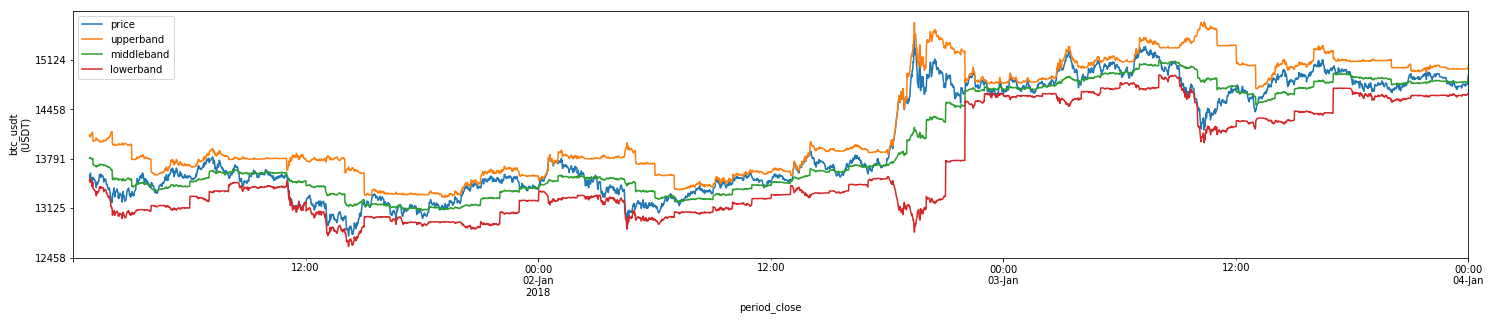

In [73]:
run_algorithm(
        capital_base=10000,
        data_frequency='minute',
        initialize=initialize,
        handle_data=handle_data,
        analyze=analyze,
        exchange_name='binance',
        algo_namespace=NAMESPACE,
        quote_currency='usdt',
        start=pd.to_datetime('2018-1-1', utc=True),
        end=pd.to_datetime('2018-1-3', utc=True),
    )